## **Naive Bayes Classifier**
Naive Bayes classifier is a probabilistic classifier based on the Bayes formula with a strict (naive) assumption of the independence of features among themselves for a given class, which greatly simplifies the classification task due to the evaluation of one-dimensional probability densities instead of one multidimensional one.

### **The main idea**

In this case, a one-dimensional probability density is an estimate of the probability of each feature separately, provided they are independent, and a multidimensional one is an estimate of the probability of a combination of all features, which follows from the case of their dependence. It is for this reason that this classifier is called naive, since it greatly simplifies calculations and increases the efficiency of the algorithm. However, this assumption is not always true in practice and in some cases can lead to a significant deterioration in the quality of predictions.

The Bayes formula itself looks like this:

$$P(A|B) = \frac{P(B|A) P(A)}{P(B)}$$

where:
- $P(A|B)$ is the a posterior probability of event A, provided event B is executed;

- $P(B|A)$ is the conditional probability of event B, provided that event A is executed;

- $P(A)$ and $P(B)$ are prior probabilities of events A and B respectively.

And in the context of machine learning, the Bayes formula takes the following form:

$$P(y_k|X) = \frac{P(y_k)P(X|y_k)}{P(X)}$$

where:
- $P(y_k|X)$ is a posterior probability of the sample belonging to the class $y_k$, taking into account its features $X$;
- $P(X|y_k)$ is likelihood, that is, the probability of features $X$ for a given class $y_k$;
- $P(y_k)$ is the a prior probability that a randomly selected observation belongs to the class $y_k$;
- $P(X)$ is the a prior probability of features $X$.

If an object is described by not one, but several features $X_1, X_2, ..., X_n$, then the formula takes the form:

$$P(y_k|X_1, X_2, ..., X_n) = \frac{P(y_k)\prod_{i=1}^n P(X_i|y_k)}{P(X_1, X_2, ..., X_n)}$$

In practice, the numerator of this formula is of the greatest interest, since the denominator depends only on the features, not on the class, and therefore it is often omitted when comparing the probabilities of different classes. Ultimately, the classification rule will be proportional to the choice of the class with the maximum a posterior probability:

$$y_k \propto \arg\max_{y_k} P(y_k)\prod_{i=1}^n P(X_i|y_k)$$

To estimate the parameters of the model, that is, the probabilities $P(y_k)$ and $P(X_i|y_k)$, the maximum likelihood method is usually used, which is based on the frequency of occurrence of classes and features in the training dataset.

### **Naive Bayes varieties**
The scikit-learn library has several implementations of the naive Bayes classifier, differing in assumptions about the distribution of features for a given class. These include the following:

- **Gaussian naive Bayes classifier (GaussianNB)** is an option for working with continuous features that have a normal (Gaussian) distribution. The probability of a feature for a given class is calculated using the formula: $$P(x_i|y) =\frac{1}{\sqrt{2\pi\sigma_y^2}}\exp\left(-\frac{(x_i-\mu_y)^2}{2\sigma_y^2}\right)$$ where $\mu_y$ and $\sigma_y$ are the mean and standard deviations of the feature in the class $y$. These parameters are estimated using the maximum likelihood method based on training dataset.

- **The Multinomial naive Bayes classifier (MultinomialNB)** is an option for working with discrete features that have a multinomial distribution. Such features are often found in text classification tasks, where they represent the number of occurrences in the text. The probability of a feature for a given class is calculated using the formula: $$P(x_i|y) =\frac{N_{yi} +\alpha}{N_y + \alpha n}$$ where $N_{yi}$ is the number of times the feature $i$ occurs in the class $y$; $N_y$ is the total number of all features in the class $y$; $n$ is the number of different features; and $\alpha$ is a smoothing parameter that prevents the occurrence of zero probabilities.

- **Complement Naive Bayes classifier (ComplementNB)** is an improved version of *MultinomialNB*, suitable for unbalanced datasets. Instead of estimating the probability of a feature for a given class, the algorithm evaluates the normalized weight of the feature $w_{ci}$ for the class $c$ as the probability of the feature when the class is complemented, that is, for all other classes. Thus, the algorithm takes into account not only the frequency of features in the class, but also their absence in other classes, which makes it less sensitive to sampling bias. The formula for calculating the probability of a feature when complementing a class is as follows: \begin{align}\begin{aligned}\hat{\theta}_{ci} = \frac{\alpha_i + \sum_{j:y_j \neq c} d_{ij}}
                         {\alpha + \sum_{j:y_j \neq c} \sum_{k} d_{kj}}\\w_{ci} = \log \hat{\theta}_{ci}\\w_{ci} = \frac{w_{ci}}{\sum_{j} |w_{cj}|}\end{aligned}\end{align}
where is $\hat{\theta}_{ci}$ is an estimate of the probability of the feature $i$ when complementing the class $c$, which is calculated using the smoothing parameter $\alpha_i$ and the frequency of the feature $i$ in all classes except $c$ (in this case $d_{ij}$ is the number of times when the feature $i$ occurs in the $j$ class); $w_{ci}$ is the normalized weight of the feature $i$ for the $c$ class. The predicted class $\hat c$ for a given feature vector $t$ will look like this: $$\hat{c} = \arg\min_c \sum_{i} t_i w_{ci}$$

- **Bernoulli Naive Bayes classifier (BernoulliNB)** is another option for working with discrete features, but which have a Bernoulli distribution. In this case, the features are binary indicators of the presence or absence of certain properties in an object. For example, in a text classification task, this may be the presence or absence of certain words in the text. The probability of a feature for a given class is calculated using the formula: $$P(x_i|y) = P(x_i = 1|y)x_i + (1-P(x_i = 1|y))(1-x_i)$$ where $P(x_i = 1|y)$ is the probability that the feature $i$ takes the value 1 (true), provided that the object belongs to the class $y$; $x_i$ is the value of the feature $i$ (0 or 1).

- **Categorical Naive Bayes classifier (CategoricalNB)** is an option for categorically distributed data based on the assumption that each feature described by the index has its own categorical distribution. The probability of a feature for a given class is calculated using the formula: $$P(x_i = t \mid y = c \: ;\, \alpha) = \frac{ N_{tic} + \alpha}{N_{c} + \alpha n_i}$$ where $N_{tic} =|\{j \in J\mid x_{ij} =t, y_j =c\}|$ is the number of times the feature $x_i$ takes the value $t$ in the class $c$; $N_{c} = |\{j \in J\mid y_j = c\}|$ is the total number of all features in the class $c$ in the training dataset; $\alpha$ is a smoothing parameter; $n_i$ is the number of available values of the feature $i$.

### **The principle of Naive Bayes classifier operation with a Gaussian distribution**
The algorithm is constructed as follows:
- 1) the a prior probabilities of classes are initially calculated;
- 2) after that, the average and standard deviations of features by class are calculated;
- 3) based on the obtained deviations of features by classes, the probabilistic density of test features is calculated according to the Gaussian distribution;
- 4) next, the posterior probabilities are calculated as the product of the prior probabilities of the classes and the probabilistic densities of the test features;
- 5) classes with the maximum a posterior probability will be the final prediction.

### **Naive Bayes in Spam filtering tasks**
In the context of spam filtering, Naive Bayes classifier is based on the frequency of occurrence of words in messages for spam and non-spam and maximizing the product of their probabilities. Naivety in this case will consist in the assumption that the words in the message are independent of the order and context. Then the Bayes formula takes the following form:

$$P(C|M) \propto P(C) \prod_{i=1}^n P(w_i|C), \ \ w_i \in M$$

where:
- C — class spam or not spam;
- M — message;
- w_i — the i-th word in the message M;
- $\propto$ — the proportionality sign.

For a better understanding, consider the following example. Suppose we want to classify the message **"Hi, you won a discount and you can get the prize this evening."** and we have a training dataset consisting of the following messages:

| Message | Class |
| --- | --- |
| Hi, how are you? | Not spam |
| Congratulations, you won a prize! | Spam |
| Buy the product now and get a discount! | Spam |
| Let's walk this evening. | Not spam |

The first step is to calculate the frequency of occurrence of all unique words and their total number in spam and non-spam messages. Then the probability of encountering each word in spam and non-spam messages is calculated based on these frequencies. When there are words in the message that were not previously found in the training dataset, smoothing is used. There are many different types of smoothing, but the essence of the simplest of them is to add $1$ when calculating the frequency of words in messages. This technique avoids the zero probability problem. Below is a table with the calculation of probabilities for all words.

| Word | Frequency in Not Spam | Frequency in Spam | Probability in Not Spam | Probability in Spam  |
| --- | --- | --- | --- | --- |
| Hi | 1 + $1$ = 2 | 0 + $1$ = 1 | 2 / 28 = 0.0714 | 1 / 33 = 0.03 |
| how | 1 + $1$ = 2 | 0 + $1$ = 1 | 2 / 28 = 0.0714 | 1 / 33 = 0.03 |
| are | 1 + $1$ = 2 | 0 + $1$ = 1 | 2 / 28 = 0.0714 | 1 / 33 = 0.03 |
| you | 1 + $1$ = 2 | 1 + $1$ = 2 | 2 / 28 = 0.0714 | 2 / 33 = 0.06 |
| Congratulations | 0 + $1$ = 1 | 1 + $1$ = 2 | 1 / 28 = 0.0357 | 2 / 33 = 0.06 |
| won | 0 + $1$ = 1 | 1 + $1$ = 2 | 1 / 28 = 0.0357 | 2 / 33 = 0.06 |
| a | 0 + $1$ = 1 | 2 + $1$ = 3 | 1 / 28 = 0.0357 | 3 / 33 = 0.09 |
| prize | 0 + $1$ = 1 | 1 + $1$ = 2 | 1 / 28 = 0.0357 | 2 / 33 = 0.06 |
| Buy | 0 + $1$ = 1 | 1 + $1$ = 2 | 1 / 28 = 0.0357 | 2 / 33 = 0.06 |
| the | 0 + $1$ = 1 | 1 + $1$ = 2 | 1 / 28 = 0.0357 | 2 / 33 = 0.06 |
| product | 0 + $1$ = 1 | 1 + $1$ = 2 | 1 / 28 = 0.0357 | 2 / 33 = 0.06 |
| now | 0 + $1$ = 1 | 1 + $1$ = 2 | 1 / 28 = 0.0357 | 2 / 33 = 0.06 |
| and | 0 + $1$ = 1 | 1 + $1$ = 2 | 1 / 28 = 0.0357 | 2 / 33 = 0.06 |
| get | 0 + $1$ = 1 | 1 + $1$ = 2 | 1 / 28 = 0.0357 | 2 / 33 = 0.06 |
| discount | 0 + $1$ = 1 | 1 + $1$ = 2 | 1 / 28 = 0.0357 | 2 / 33 = 0.06 |
| Let's | 1 + $1$ = 2 | 0 + $1$ = 1 | 2 / 28 = 0.0714 | 1 / 33 = 0.03 |
| walk | 1 + $1$ = 2 | 0 + $1$ = 1 | 2 / 28 = 0.0714 | 1 / 33 = 0.03 |
| this | 1 + $1$ = 2 | 0 + $1$ = 1 | 2 / 28 = 0.0714 | 1 / 33 = 0.03 |
| evening | 1 + $1$ = 2 | 0 + $1$ = 1 | 2 / 28 = 0.0714 | 1 / 33 = 0.03 |
| can | 0 + $1$ = 1 | 0 + $1$ = 1 | 1 / 28 = 0.0357 | 1 / 33 = 0.03 |
| **Total amount of words** | **28** | **33** |

At the end, the probabilities of the message being spam or not spam are calculated, and the final prediction will be the class with the highest probability.

$P(C|M) = P(C) \cdot P('Hi'|C) \cdot P('you'|C) \cdot P('won'|C) \cdot P('a'|C)
\cdot P('discount'|C) \cdot P('and'|C) \cdot P('you'|C) \cdot P('can'|C) \cdot P('get'|C)
\cdot P('the'|C) \cdot P('prize'|C) \cdot P('this'|C) \cdot P('evening'|C)$

Where:
- $C \in (Spam, \ \ Not \ \ Spam)$;
- $P(Spam) = P(Not \ \ Spam) = \frac{2}{4} = 0.5$


$P(Spam|M) = 0.5 \cdot 0.03 \cdot 0.06 \cdot 0.06 \cdot 0.09 \cdot 0.06 \cdot 0.06 \cdot 0.06 \cdot 0.03 \cdot 0.06 \cdot 0.06 \cdot 0.06 \cdot 0.03 \cdot 0.03 \approx 6.12 \cdot 10^{-18}$

$P(Not \ \ Spam|M) = 0.5 \cdot 0.0714 \cdot 0.0714 \cdot 0.0357 \cdot 0.0357 \cdot 0.0357 \cdot 0.0357 \cdot 0.0714 \cdot 0.0357 \cdot 0.0357 \cdot 0.0357 \cdot 0.0357 \cdot 0.0714 \cdot 0.0714 \approx 2.45 \cdot 10^{-18}$

$P(Spam|M) > P(Not \ \ Spam|M) \rightarrow$ **the message is spam**

It is worth adding that in practice, for convenience of calculations, the logarithm of probability is often used instead of the probability itself.

### **Python implementation from scratch**

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [31]:
class GaussianNaiveBayes:
    def fit(self, X, y):
        classes, cls_counts = np.unique(y, return_counts=True)
        n_classes = len(classes)
        self.priors = cls_counts / len(y)

        # calculate the mean and standard deviations of features by classes
        self.X_cls_mean = np.array([np.mean(X[y == c], axis=0) for c in range(n_classes)])
        self.X_stds = np.array([np.std(X[y == c], axis=0) for c in range(n_classes)])

    # calculate the probability density of the feature according to the Gaussian distribution
    def pdf(self, x, mean, std):
        return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - mean) / std) ** 2)

    def predict(self, X):
        pdfs = np.array([self.pdf(x, self.X_cls_mean, self.X_stds) for x in X])
        posteriors = self.priors * np.prod(pdfs, axis=2)   # shorten Bayes formula

        return np.argmax(posteriors, axis=1)

In [32]:
def decision_boundary_plot(X, y, X_train, y_train, clf, feature_indexes, title=None):
    feature1_name, feature2_name = X.columns[feature_indexes]
    X_feature_columns = X.values[:, feature_indexes]
    X_train_feature_columns = X_train[:, feature_indexes]
    clf.fit(X_train_feature_columns, y_train)

    plot_decision_regions(X=X_feature_columns, y=y.values, clf=clf)
    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.title(title)

### **Uploading a dataset**
[Iris dataset](https://www.kaggle.com/datasets/himanshunakrani/iris-dataset) will be used to train models, where it is necessary to correctly determine the types of flowers based on their characteristics.

In [33]:
df_path = "/content/drive/MyDrive/iris.csv"
iris = pd.read_csv(df_path)
X1, y1 = iris.iloc[:, :-1], iris.iloc[:, -1]
y1 = pd.Series(LabelEncoder().fit_transform(y1))
X1_train, X1_test, y1_train, y1_test = train_test_split(X1.values, y1.values, random_state=0)
print(iris)


     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


### **Model training and evaluation of the obtained results**
Despite its simplicity, in this case the algorithm has showed an excellent result by classifying all the samples correctly, which is possible due to the construction of a flexible decision boundary. From this we can draw an interesting conclusion that in some situations simple models can work much better than complex ones, which can be seen later on the example of other algorithms.

**Naive Bayes**

In [34]:
nb_clf = GaussianNaiveBayes()
nb_clf.fit(X1_train, y1_train)
nb_clf_pred_res = nb_clf.predict(X1_test)
nb_clf_accuracy = accuracy_score(y1_test, nb_clf_pred_res)

print(f'Naive Bayes classifier accucacy: {nb_clf_accuracy}')
print(nb_clf_pred_res)

Naive Bayes classifier accucacy: 1.0
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


**Naive Bayes (scikit-learn)**

sk Naive Bayes classifier accucacy: 1.0
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


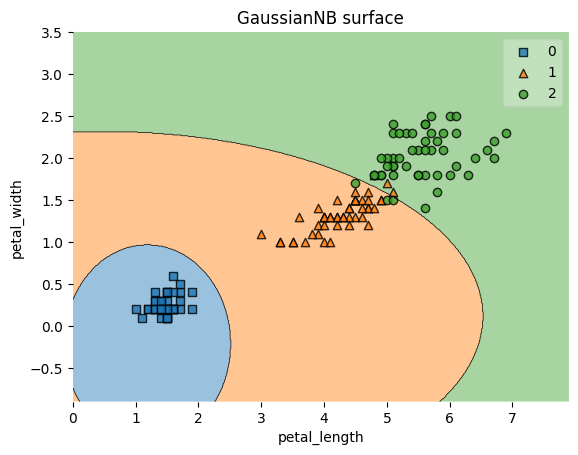

In [35]:
sk_nb_clf = GaussianNB()
sk_nb_clf.fit(X1_train, y1_train)
sk_nb_clf_pred_res = sk_nb_clf.predict(X1_test)
sk_nb_clf_accuracy = accuracy_score(y1_test, sk_nb_clf_pred_res)

print(f'sk Naive Bayes classifier accucacy: {sk_nb_clf_accuracy}')
print(sk_nb_clf_pred_res)

feature_indexes = [2, 3]
title1 = 'GaussianNB surface'
decision_boundary_plot(X1, y1, X1_train, y1_train, sk_nb_clf, feature_indexes, title1)

### **Pros and cons of the Naive Bayes classifier**
Pros:
- easy to implement and interpret;
- practically no parameter settings are required;
- high speed and accuracy of predictions in many situations;
- it has relatively good resistance to noise and outliers, since it is based on probability distributions and a naive assumption of the independence of features.

Cons:
- in a case of violation of the assumption of independence of features, the accuracy of predictions may significantly decrease;
- may give preference to classes with a large number of samples in case of unbalanced data.

### **Additional sources**
Paper «Bayes and Naive-Bayes Classifier», Rajiv Gandhi, Andhra Pradesh.

Documentation:
- [Naive Bayes description](https://scikit-learn.org/stable/modules/naive_bayes.html);
- [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB);
- [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB);
- [ComplementNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB);
- [BernoulliNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB);
- [CategoricalNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html#sklearn.naive_bayes.CategoricalNB).

Video: [one](https://www.youtube.com/watch?v=O2L2Uv9pdDA), [two](https://www.youtube.com/watch?v=H3EjCKtlVog), [three](https://www.youtube.com/watch?v=nt63k3bfXS0), [four](https://www.youtube.com/watch?v=ADj95edZc0w).

